In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [41]:
DATASET = 'compas'
sensitive_0_val = 'white'
sensitive_1_val = 'black'
alg = ''
lb = 0.1

In [42]:
# DATASET = 'income'
# sensitive_0_val = 'male'
# sensitive_1_val = 'female'

In [43]:
# pref = '' if alg == 'ghost' else 'l_/'

# if alg == 'ghost':

obj_gh = (pd.read_csv('../utils/' + str(DATASET)+f'_ftrial_{lb}.csv').values)
cons1_gh = (pd.read_csv('../utils/' + str(DATASET)+f'_ctrial1_{lb}.csv').values)
cons2_gh = (pd.read_csv('../utils/' + str(DATASET)+f'_ctrial2_{lb}.csv').values)

# else:

obj_al = (pd.read_csv('../utils/l_' + str(DATASET)+f'_ftrial_{lb}.csv').values)
cons_al = (pd.read_csv('../utils/l_' + str(DATASET)+f'_ctrial_{lb}.csv').values)


In [44]:
cons_al

array([[1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 0.00000000e+00],
       ...,
       [6.92800000e+03, 3.44804749e-02],
       [6.92900000e+03, 3.42672691e-02],
       [6.93000000e+03, 3.40583548e-02]])

In [45]:
# for i in range(0, len(obj_al)):
#     obj_al[i, :] = np.sort(obj_al[i, :])
#     cons_al[i, :] = np.sort(cons_al[i, :])

# quart_ind = int(obj_al.shape[1]/4)
# mid_ind = int(obj_al.shape[1]/2)
# three_quart_ind = int((3*obj_al.shape[1])/4)

In [46]:
maxiter = len(cons_al)

[]

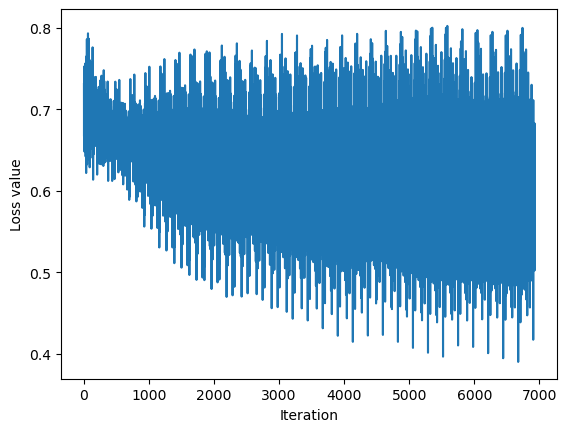

In [52]:
plt.plot(range(0, maxiter), obj_al.T[1], '-')
# plt.fill_between(range(0, maxiter), cons_al[:, quart_ind], cons_al[:, three_quart_ind])
plt.xlabel('Iteration')
plt.ylabel('Loss value')
plt.plot()

[]

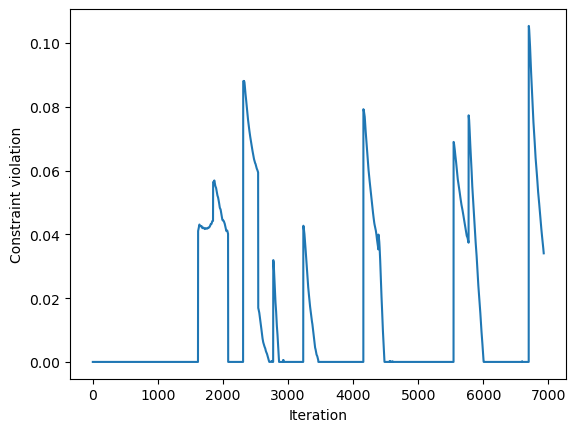

In [47]:
plt.plot(range(0, maxiter), np.mean(cons_al.T[1:], axis=0), '-')
# plt.fill_between(range(0, maxiter), cons_al[:, quart_ind], cons_al[:, three_quart_ind])
plt.xlabel('Iteration')
plt.ylabel('Constraint violation')
plt.plot()

In [88]:
for i in range(0, len(obj_al)):
    obj_al[i, :] = np.sort(obj_al[i, :])
    cons_al[i, :] = np.sort(cons_al[i, :])

quart_ind = int(obj_al.shape[1]/4)
mid_ind = int(obj_al.shape[1]/2)
three_quart_ind = int((3*obj_al.shape[1])/4)

In [89]:
for i in range(0, len(obj_gh)):
    obj_gh[i, :] = np.sort(obj_gh[i, :])
    cons1_gh[i, :] = np.sort(cons1_gh[i, :])
    cons2_gh[i, :] = np.sort(cons2_gh[i, :])

In [90]:
quart_ind = int(obj_gh.shape[1]/4)
mid_ind = int(obj_gh.shape[1]/2)
three_quart_ind = int((3*obj_gh.shape[1])/4)

In [91]:
maxiter = len(obj_gh)

[]

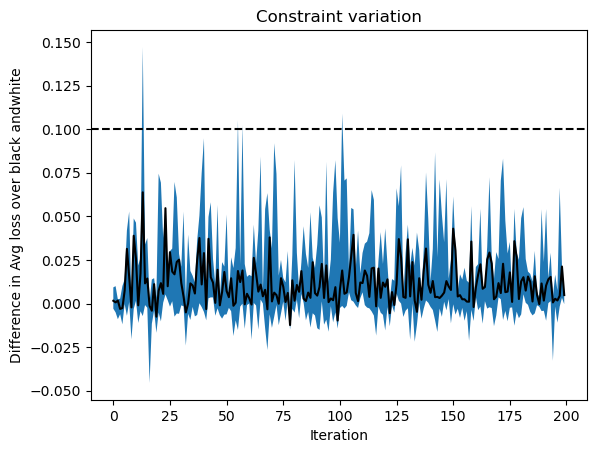

In [92]:
plt.plot(range(0, maxiter), cons1_gh[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), cons1_gh[:, quart_ind], cons1_gh[:, three_quart_ind])
#plt.axhline(y=-0.001, color='black', linestyle='--', label='Horizontal Line at y=3')
plt.axhline(y=lb, color='black', linestyle='--', label='Horizontal Line at y=3')
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.title("Constraint variation")
plt.xlabel('Iteration')
plt.ylabel('Difference in Avg loss over '+str(sensitive_1_val)+' and'+ str(sensitive_0_val))
#plt.yscale('log')
plt.plot()

[]

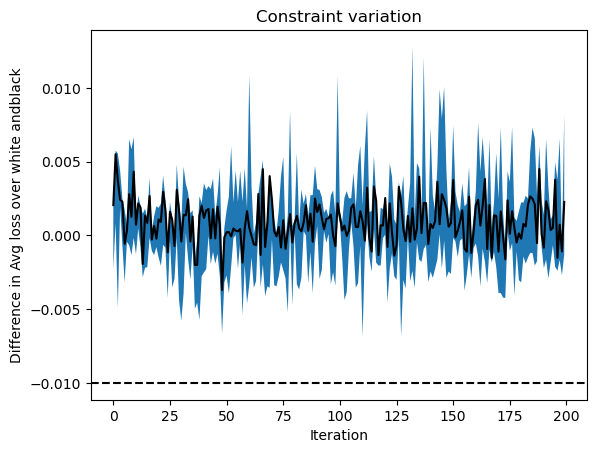

In [11]:
plt.plot(range(0, maxiter), cons2_gh[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), cons2_gh[:, quart_ind], cons2_gh[:, three_quart_ind])
#plt.axhline(y=-0.001, color='black', linestyle='--', label='Horizontal Line at y=3')
plt.axhline(y=-lb, color='black', linestyle='--')
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.title("Constraint variation")
plt.xlabel('Iteration')
plt.ylabel('Difference in Avg loss over '+str(sensitive_0_val)+' and'+ str(sensitive_1_val))
#plt.yscale('log')
plt.plot()

In [12]:
cons = (cons1_gh+cons2_gh)/2

[]

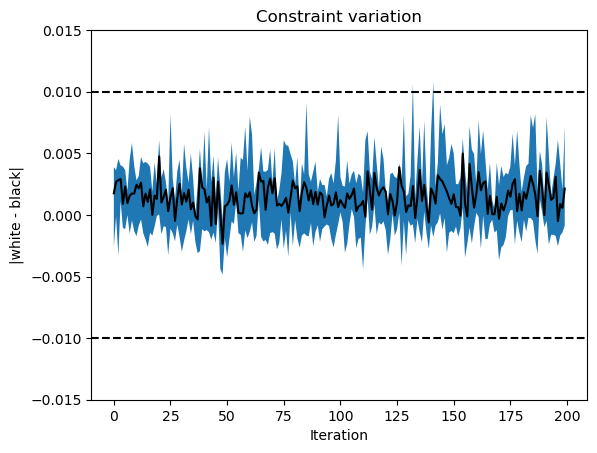

In [13]:
plt.plot(range(0, maxiter), cons[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), cons[:, quart_ind], cons[:, three_quart_ind])
plt.axhline(y=-lb, color='black', linestyle='--')
plt.axhline(y=lb, color='black', linestyle='--')
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.ylim(-1.5*lb, 1.5*lb)
plt.title("Constraint variation")
plt.xlabel('Iteration')
plt.ylabel('|'+str(sensitive_0_val)+' - '+str(sensitive_1_val)+'|')
# plt.yscale('log')
plt.plot()

In [ ]:
obj_gh[0]

array([0.72597909, 1.        ])

[]

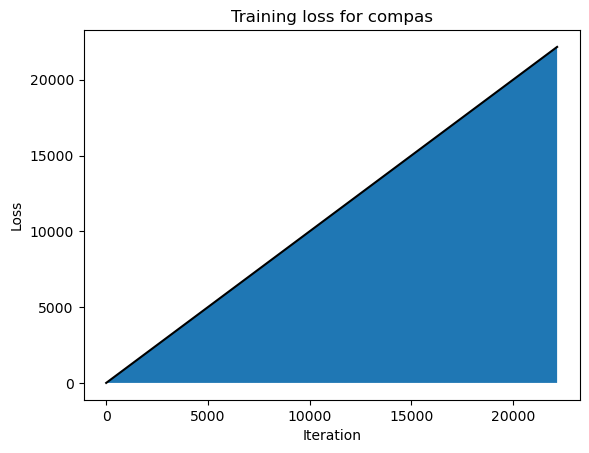

In [ ]:
plt.plot(range(0, maxiter), obj_gh[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), obj_gh[:, quart_ind], obj_gh[:, three_quart_ind])
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.title("Training loss for "+ DATASET)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot()